# Project: Investigation of The Movie Database (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset
In this study, the TMDb movie dataset is used for data analysis. This dataset several information such as budget, revenue, cast, popularity etc. for the movies released between 1960 and 2015.

Based on this data, following 10 research questions will be answered.

 *1: Which movie has longest runtime?<br>
 *2: Which movie has shorthest runtime?<br>
 *3: Does the most popular movie has the highest budget?<br>
 *4: What is the average profit for movies in TMDb?<br>
 *5 : What is the trend of the profit based on release years of the movies?<br>
 *6 : Is there a correlation between the budget and the revenue for the movies? How strong is this correlation?<br>
 *7 : Is there a correlation between the average vote and the revenue for the movies?<br>
 *8 : Is there a difference between old and new movies based on their average profits?<br>
 *9 : Which production companies make average more profit than others? Find the top 5 company.<br>
 *10 : Which movies make more money based on movie genre? Show the top 5 genres.<br>


Some required Python packages are imported in the code-cell below:

In [256]:
## IMPORTING PACKAGES
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
#to make sure that the visualizations pop up in Jupyter Notebook
% matplotlib inline 
import operator

<a id='wrangling'></a>
## Data Wrangling

In this section, the data is examined by using Python packages to make the dataset is ready for cleaning.<br>


In [257]:
## DATA IMPORT and DIMENSIONS
dfi = pd.read_csv('tmdb_movies.csv') #i stands for initial
#
msg1 = ('The number of rows is {} and the number of columns is {}\n')
out1 = msg1.format(dfi.shape[0], dfi.shape[1])
print(out1)

The number of rows is 10866 and the number of columns is 21



In [258]:
## COLUMN NAMES
msg2 = ('\nThe names of columns in the data are given below:\n\n{}')
out2 = msg2.format(list(dfi.columns))
print(out2) #since head() won't show all columns!


The names of columns in the data are given below:

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


In [259]:
## INITIAL CHECK
dfi.head(1) #the first row of the data 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [260]:
## INITIAL CHECK
dfi.tail(1) #the last row of the data 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


**Comments on Initial Data Checks**<br>
In some columns the phrases (strings) are separated by '|' character. <br>
In those columns, there are phrases in which exist multiple words with spaces
(e.g. <font color='red'>'Village Roadshow Pictures'</font> ).<br>

In [261]:
## MORE INFO on INITIAL DATASET
dfi.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

As it can be seen in the info above, some of the columns have missing data.<br>

**Comments on Missing Data**<br>
It seems that some of the attributes have missing data (e.g. homepage, tagline, keywords etc.).<br>
Handling this missing values will be discussed in 'Data Cleaning' section.

Last but not the least, let's have a look for the some statistics about the data.

In [262]:
dfi.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some of the statistics seem odd!<br>
For example, minimum runtime is zero! Clearly there are missing information in the dataset.<br>
In the next section, the dataset will be cleaned and re-organized!

### Data Cleaning

In this section, the initial dataset (dfi) will be cleaned and re-organized<br>
<br>
In any part of this study, we may want to have a look the initial dataset.<br>
Thus, let's keep the initial dataset and do data cleaning with a spare of it.

In [263]:
## HAVING a SPARE of INITIAL DATA
df = dfi

Let's check the number of duplicated in the dataframe and revome them!

In [264]:
# REMOVING DUPLICATES
dupn = sum(df.duplicated())
df.drop_duplicates(inplace=True) 
msg3 = ('The number of duplicates is "{}" and removed from the data!')
out3 = msg3.format(dupn)
print(out3)

The number of duplicates is "1" and removed from the data!


Now, let's check missing values in the dataset!

In [265]:
## Calculation of Missing Values for Each Attribute
miscol_dfi = dfi.columns[dfi.isnull().any()].tolist()
misnum_dfi = list()
for i in range(0,len(miscol_dfi)):
    misnum_dfi.append(dfi.shape[0]-dfi.apply(lambda x: x.count(), axis=0)[miscol_dfi[i]])
print("The columns that has missing values and corresponding number of missing values are shown below:")
list(zip(miscol_dfi, misnum_dfi))

The columns that has missing values and corresponding number of missing values are shown below:


[('imdb_id', 10),
 ('cast', 76),
 ('homepage', 7929),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('genres', 23),
 ('production_companies', 1030)]

**DATA COLUMNS**

The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. It wouldn't be interes of point for our research questions.

Regarding our research questions, let's remove the unnecessary columns!
These colums are irrelevant to our research questions:
* imdb_id, homepage, tagline, budget_adj, revenue_adj<br>

In [266]:
df.drop(['imdb_id','homepage','tagline','budget_adj','revenue_adj'], axis=1, inplace=True)

Let's check the number of missing values again.

In [267]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 1.4+ MB


**Dropping NA Values**
There are some NA values in the dataset<br>
Let's also drop the rows in which ther are NA values!

In [268]:
df.dropna(axis=0, inplace=True)
print('Now the number of rows are reduced to',df.shape[0])

Now the number of rows are reduced to 8666


Let's also check **data types**!

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8666 entries, 0 to 10865
Data columns (total 16 columns):
id                      8666 non-null int64
popularity              8666 non-null float64
budget                  8666 non-null int64
revenue                 8666 non-null int64
original_title          8666 non-null object
cast                    8666 non-null object
director                8666 non-null object
keywords                8666 non-null object
overview                8666 non-null object
runtime                 8666 non-null int64
genres                  8666 non-null object
production_companies    8666 non-null object
release_date            8666 non-null object
vote_count              8666 non-null int64
vote_average            8666 non-null float64
release_year            8666 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 1.1+ MB


The type of release_date is string.<br>
We should convert it's type to datetime.


In [270]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [271]:
df['release_date'].head(3)

0   2015-06-09
1   2015-05-13
2   2015-03-18
Name: release_date, dtype: datetime64[ns]

Let's check some statistics at this point.

In [272]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000
mean,57003.179206,0.741937,1.770937e+07,4.924863e+07,103.815140,264.204823,6.003612,2000.129818
std,86242.565745,1.087657,3.357362e+07,1.289529e+08,26.207186,635.195808,0.893539,13.221278
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,9816.750000,0.249990,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000
50%,16216.500000,0.449377,1.500000e+06,1.793820e+05,100.000000,54.000000,6.100000,2004.000000
75%,54003.000000,0.842984,2.100000e+07,3.890269e+07,113.000000,200.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000


As you can see in the table above, the min values are 0 for the following columns:<br>
* budget
* revenue
* runtime<br>

It's obvious that there are also missing values as given 0 in this dataset!<br>
Let's assign the proportion of those rows in the dataset.

In [273]:
## NUMBER of ROWS in which the BUDGET equals ZERO!
msg4 = ('The number of rows in which the budget equals zero is {} and the proportion is {}!')
n_budzero = df[df['budget']==0].shape[0]
p_budzero = n_budzero/df.shape[0]
out4 = msg4.format(n_budzero, "{0:.2f}".format(p_budzero))
print(out4)
## NUMBER of ROWS in which the REVENUE equals ZERO!
msg5 = ('The number of rows in which the revenue equals zero is {} and the proportion is {}!')
n_revzero = df[df['revenue']==0].shape[0]
p_revzero = n_revzero/df.shape[0]
out5 = msg5.format(n_revzero, "{0:.2f}".format(p_revzero))
print(out5)
## NUMBER of ROWS in which the RUNTIME equals ZERO!
msg6 = ('The number of rows in which the runtime equals zero is {} and the proportion is {}!')
n_runzero = df[df['runtime']==0].shape[0]
p_runzero = n_runzero/df.shape[0]
out6 = msg6.format(n_runzero, "{0:.2f}".format(p_runzero))
print(out6)

The number of rows in which the budget equals zero is 3940 and the proportion is 0.45!
The number of rows in which the revenue equals zero is 4130 and the proportion is 0.48!
The number of rows in which the runtime equals zero is 7 and the proportion is 0.00!


Since the proportion of the rows in which some attributes equal zero is high, one approach is imputing those rows.<br>
However, both budget and revenue can be affected by so many factors and some of those factor might be unknown!<br>
Imputing those rows by mean, median etc. may lead to produce wrong conclusions!<br>

Although the proportion of these rows is high in the dataset, removing those rows will prevent to have wrong results!<br>
Thus, those rows are removed from the dataset!


In [274]:
zero_cols = ['budget','revenue','runtime']
df[zero_cols] = df[zero_cols].replace(0,np.NAN)
df.dropna(axis=0, inplace=True)
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 0 to 10848
Data columns (total 16 columns):
id                      3677 non-null int64
popularity              3677 non-null float64
budget                  3677 non-null float64
revenue                 3677 non-null float64
original_title          3677 non-null object
cast                    3677 non-null object
director                3677 non-null object
keywords                3677 non-null object
overview                3677 non-null object
runtime                 3677 non-null float64
genres                  3677 non-null object
production_companies    3677 non-null object
release_date            3677 non-null datetime64[ns]
vote_count              3677 non-null int64
vote_average            3677 non-null float64
release_year            3677 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 488.4+ KB


**FINDING THE UNITS**<br>
Avatar is a very popular movie and we can easily find the it's revenue and also it's runtime.<br>
According to https://en.wikipedia.org/wiki/Avatar_(2009_film), the revenue of Avatar movie is **~2.78 billion US dollars** and it's runtime is **161 minutes!**<br>
Let's check our dataset to see whether those units are valid for our dataset!


In [275]:
rev_avatar = float(df[df['original_title']=='Avatar'].revenue)
run_avatar = float(df[df['original_title']=='Avatar'].runtime)
print("For Avatar movie, the revenue is {} and the runtime is {} in this dataset!".format(rev_avatar,run_avatar))

For Avatar movie, the revenue is 2781505847.0 and the runtime is 162.0 in this dataset!


It seems that **the monetary unit is US dollar** and **the runtime unit is minutes** in this dataset!<br>
<br>
Now, let's have a second look to our dataset to see whether there are any odd numbers according to those units!

In [276]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3677.000000,3677.000000,3.677000e+03,3.677000e+03,3677.000000,3677.000000,3677.000000,3677.000000
mean,39224.526244,1.226051,3.811465e+07,1.114405e+08,109.561327,547.702203,6.182758,2001.091923
std,67249.633137,1.498897,4.267577e+07,1.793625e+08,19.855075,894.954704,0.789610,11.380391
min,5.000000,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000
25%,5470.000000,0.481276,1.000000e+07,1.489942e+07,96.000000,78.000000,5.700000,1995.000000
50%,11017.000000,0.830597,2.500000e+07,4.806344e+07,106.000000,219.000000,6.200000,2004.000000
75%,37958.000000,1.411147,5.000000e+07,1.298324e+08,120.000000,596.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


According to table above, the minimum values for budget, revenue and runtime seem odd!<br>
* The minimum budget is *only 1 USD*!
* The minimum revenue is *only 2 USD*!<br>
<br>
It's almost impossible to create a movie with only 1 USD bugdet and make only 2 USD revenue!<br>
This might be a typo. Maybe, 1 means 1 million USD but we can not know based on this data.<br>
Let's check the data whether there are further odd rows.

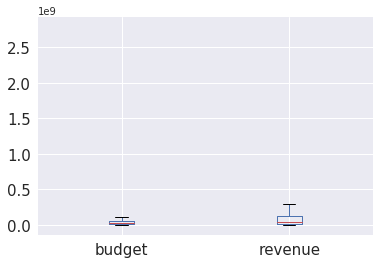

In [277]:
df.boxplot(column=['budget','revenue'],fontsize=15);

In order to increase the visibility, let's take the rows in which the budget and revenue values are more than 1 million USD.<br>
According to boxplots above, some of the budget and revenue values are extremely low.

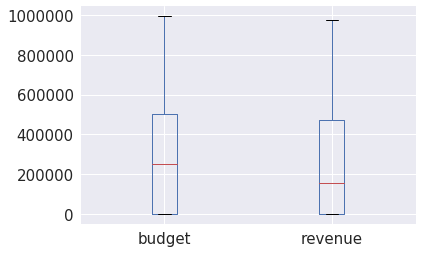

In [278]:
bud_low = df[(df['budget']<int(1e6)) & (df['revenue']<int(1e6))]
bud_low.boxplot(column=['budget','revenue'],fontsize=15);

Let's also check the summary statistics of the sub-data in which the budget is less than 1 million USD!

In [279]:
bud_low.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.00000
mean,47613.285714,0.370633,316530.000000,269116.938776,95.816327,78.918367,5.908163,2003.44898
std,61059.078588,0.249991,336933.099581,305469.023384,13.358321,119.386249,0.834375,9.39650
min,431.000000,0.028456,1.000000,11.000000,77.000000,11.000000,3.900000,1968.00000
25%,13484.000000,0.181427,68.000000,200.000000,87.000000,24.000000,5.300000,1999.00000
50%,23949.000000,0.342912,250000.000000,154323.000000,95.000000,36.000000,5.800000,2006.00000
75%,58428.000000,0.476673,500000.000000,469947.000000,99.000000,74.000000,6.500000,2011.00000
max,308638.000000,1.072912,994000.000000,973525.000000,145.000000,615.000000,7.400000,2015.00000


According to table below, first quartile is 38,750 USD!<br>
It can be also investigated whether it's a logical value for a budget of a movie however this is not efficient considering the release years.<br>
Thus, let's have a look for the rows in which the budget is less than 38750 USD!

In [280]:
ind1 = (df['budget'] >= 38750)
df2 = df.loc[ind1, :]
df2.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3650.000000,3650.000000,3.650000e+03,3.650000e+03,3650.000000,3650.000000,3650.000000,3650.000000
mean,39291.973973,1.231281,3.839655e+07,1.121042e+08,109.639178,550.632055,6.183178,2001.111507
std,67395.388559,1.502884,4.270682e+07,1.797823e+08,19.854484,897.454671,0.789689,11.378267
min,5.000000,0.010335,4.000000e+04,2.000000e+00,26.000000,10.000000,2.200000,1960.000000
25%,5478.250000,0.485155,1.000000e+07,1.542819e+07,96.000000,78.000000,5.700000,1995.000000
50%,11005.000000,0.834218,2.500000e+07,4.856021e+07,106.000000,222.000000,6.200000,2004.000000
75%,37906.750000,1.414530,5.000000e+07,1.307105e+08,120.000000,600.000000,6.700000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


Now, let's check the **outliers** in the data!

In [281]:
## FINDING OUTLIERS by Z-SCORES
# budget Column
bud_data = df2.budget.dropna()
z1 = np.abs(stats.zscore(bud_data))
bud_out = np.where(z1 > 3) #z=3 is the threshold in practice
#calculating the proportion of the outliers
print('The proportion of the outliers is "{0:.3f}" in budget column'.format(len(bud_out[0])/len(df2.budget)))
#
# revenue Column
rev_data = df2.revenue.dropna()
z2 = np.abs(stats.zscore(rev_data))
rev_out = np.where(z2 > 3) #z=3 is the threshold in practice
#calculating the proportion of the outliers
print('The proportion of the outliers is "{0:.3f}" in revenue column'.format(len(rev_out[0])/len(df2.revenue)))
#
# runtime Column
run_data = df2.runtime.dropna()
z3 = np.abs(stats.zscore(run_data))
run_out = np.where(z3 > 3) #z=3 is the threshold in practice
#calculating the proportion of the outliers
print('The proportion of the outliers is "{0:.3f}" in runtime column'.format(len(run_out[0])/len(df2.runtime)))
#
# vote_count Column
vc_data = df2.vote_count.dropna()
z4 = np.abs(stats.zscore(vc_data))
vc_out = np.where(z4 > 3) #z=3 is the threshold in practice
#calculating the proportion of the outliers
print('The proportion of the outliers is "{0:.3f}" in vote_count column'.format(len(vc_out[0])/len(df2.vote_count)))
#

The proportion of the outliers is "0.022" in budget column
The proportion of the outliers is "0.024" in revenue column
The proportion of the outliers is "0.015" in runtime column
The proportion of the outliers is "0.025" in vote_count column


Above, the proportions for outliers are significantly low.<br>
Thus, we do not have to exclude any outliers from the dataset.

Lastly, revenue itself won't provide an intuition for the success of a movie.
Thus, let's add an additional column 'profit' which equals revenue-budget

In [282]:
df['profit']=df.revenue-df.budget
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.363529e+09


Now, let's give a start for **'Exploratory Data Analysis'** in next section.

<a id='eda'></a>
## Exploratory Data Analysis

Based on organized and cleaned TMDb dataset, some analyzes are performed in this section in order to find answers to the 13 research questions given in the introduction section.

### Research Question 1: Which movie has longest runtime?

In [287]:
max_run = df[df['runtime'] == df['runtime'].max()]
print("The movie has the maximum run time is '{}' with '{}' minutes!".format(max_run.original_title.iloc[0],max_run.runtime.iloc[0]))

The movie has the maximum run time is 'Carlos' with '338.0' minutes!


### Research Question 2: Which movie has shorthest runtime?

In [288]:
min_run = df[df['runtime'] == df['runtime'].min()]
print("The movie has the minimum run time is '{}' with '{}' minutes!".format(min_run.original_title.iloc[0],min_run.runtime.iloc[0]))

The movie has the minimum run time is 'Mickey's Christmas Carol' with '26.0' minutes!


### Research Question 3: Does the most popular movie has the highest budget?

In [289]:
max_pop = df[df['popularity'] == df['popularity'].max()]
print("The most popular movie is '{}' with '{}' USD budget!".format(max_pop.original_title.iloc[0],max_pop.budget.iloc[0]))

The most popular movie is 'Jurassic World' with '150000000.0' USD budget!


In [290]:
max_bud = df[df['budget'] == df['budget'].max()]
print("The highest budget movie is '{}' with '{}' USD budget!".format(max_bud.original_title.iloc[0],max_bud.budget.iloc[0]))

The highest budget movie is 'The Warrior's Way' with '425000000.0' USD budget!


### Research Question 4: What is the average profit for movies in TMDb?

In [291]:
## NUMBER of ROWS in which the RUNTIME equals ZERO!
msg = ('The average profit for the {} movies in the dataset is {} US dollars!\nHowever this dataset contains animations and short movies as well.')
msg2 = ('\nIf we only consider the movies that it\'s runtime more than (or equal to) 60 minutes\nThe average profit for the {} movies in the dataset is {} US dollars!')
nummov = df.profit.count()
revmov = df['profit'].mean(skipna=True)
out = msg.format(nummov, "{0:.2f}".format(revmov))
print(out)
#
nummov2 = df[df['profit'] >=60].revenue.count()
revmov2 = df[df['profit'] >=60].revenue.mean(skipna=True)
out2 = msg2.format(nummov2, "{0:.2f}".format(revmov2))
print(out2)

The average profit for the 3677 movies in the dataset is 73325870.07 US dollars!
However this dataset contains animations and short movies as well.

If we only consider the movies that it's runtime more than (or equal to) 60 minutes
The average profit for the 2683 movies in the dataset is 146842281.00 US dollars!


### Research Question 5 : What is the trend of the profit based on release years of the movies?

Let's draw a scatter plot to answer this question visually:

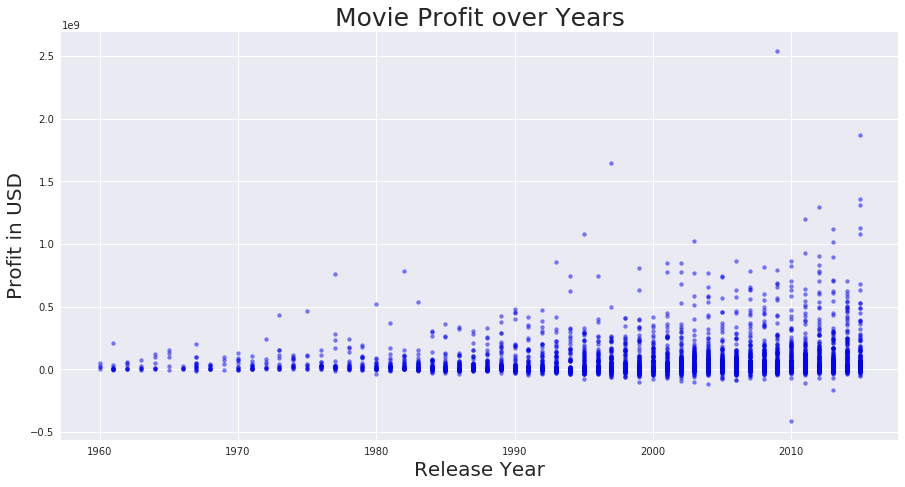

In [292]:
#Subsets
x = df.release_year
y = df.profit
#Colors, Area and Dimensions
fig_size = plt.rcParams["figure.figsize"]
colors = (0,0,1)
area = 15
fig_size[0] = 15
fig_size[1] = 7.5
plt.scatter(x, y , s=area, c=colors, alpha=0.5)
#
plt.title('Movie Profit over Years',fontsize=25)
plt.xlabel('Release Year',fontsize=20)
plt.ylabel('Profit in USD',fontsize=20)
plt.show()

Scatter plot is relatively hard to read for people who they are not familiar with graphs!<br>
Let's try to plot a simpler graph!<br>

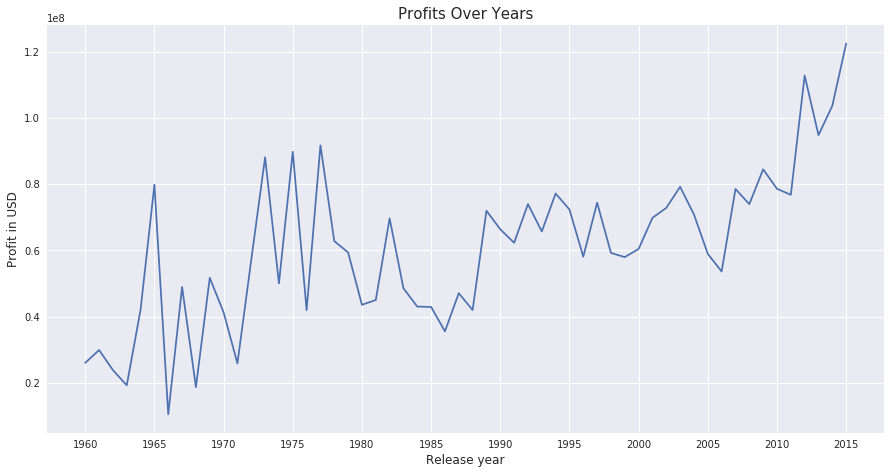

In [293]:
#Creating a group based on release year and average profit for each years
mrev_year = df.groupby('release_year').mean()['profit']

#Plot and setting the range of X-axis and step size 
mrev_year.plot(xticks = np.arange(1960,2016,5))
#Figure size, font size and labels
sns.set(rc={'figure.figsize':(12,5)})
plt.title("Profits Over Years",fontsize = 15)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Profit in USD',fontsize = 12);

Altough the profit is fluctuating over years, the trend is an increasing trend for the profit of the movies.<br>

### Research Question 6 : Is there a correlation between the budget and the revenue for the movies?<br>How strong is this correlation?

Let's draw a scatter plot for budget-revenue pairs and calculate the correlation:

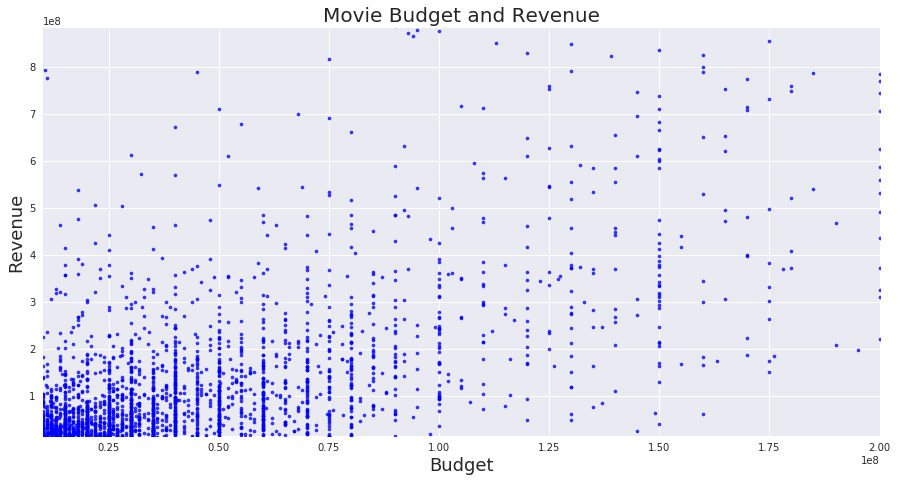

In [294]:
#Subsets
x = df.budget
y = df.revenue
#Colors, Area and Dimensions
fig_size = plt.rcParams["figure.figsize"]
colors = (0,0,1)
area = 10
fig_size[0] = 15
fig_size[1] = 7.5
plt.scatter(x, y , s=area, c=colors, alpha=0.5)
#Calculating and setting the limits for the x-axis for a better visualization
sor_bud = sorted(x)
bq1, bq3= np.percentile(sor_bud,[25,99]) #setting 25% and 99% percentiles (because lower percentile movies are mostly either short movies or animations)
plt.xlim(bq1,bq3)
#
sor_rev = sorted(y)
rq1, rq3= np.percentile(sor_rev,[25,99]) #setting 25% and 99% percentiles (because lower percentile movies are mostly either short movies or animations)
plt.ylim(rq1,rq3)
#
plt.scatter(x, y , s=area, c=colors, alpha=0.5)
plt.title('Movie Budget and Revenue', fontsize=20)
plt.xlabel('Budget',fontsize=18)
plt.ylabel('Revenue',fontsize=18)
plt.show()

The positive correlation can be seen in the scatter plot above, however it's a bit hard to interpret whether there is correlation or how strong is the correlation in the plot above.<br>
Let's calculate the correlation coefficient between revenue and budget.

In [295]:
# calculate spearman's correlation
corr, _ = spearmanr(df.budget, df.revenue)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.663


**Conclusion:**<br>
There is a between moderate correlation (r = ~0.66) between budget and revenue.<br>

### Research Question 7  : Is there a correlation between the average vote and the revenue for the movies?


In [296]:
# calculate spearman's correlation
corr, _ = spearmanr(df.vote_average, df.revenue)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.194


**Conclusion:**<br>
There is a very weak correlation (r = ~0.19) between average vote and revenue.<br>

### Research Question 8  : Is there a difference between old and new movies based on their average profits?


To answer this question, let's try to define what is old and what is new.

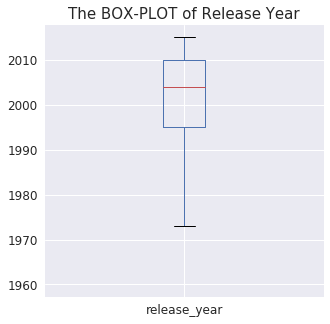

In [297]:
## Checking time range for the dataset
#Colors, Area and Dimensions
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.title('The BOX-PLOT of Release Year', fontsize=15)
df.boxplot(column=['release_year'],fontsize=12);

Let's also calculate the mean value for the release years.

In [298]:
round(float(df.release_year.mean()),0)

2001.0

2001 is adjacent to 2000.
Thus, let's call the movies
* **Old** if they're released before 2000
* **New** if they're released after (or in) 2000

In [299]:
## CREATION of New and Old Sub-Datasets
old_rev = df[df.release_year < 2000]
new_rev = df[df.release_year >=2000]
msg = 'The old movies have {} US dollars profit in average!\nThe new movies have {} US dollars profit in average!'
print(msg.format("{0:.0f}".format(old_rev.profit.mean()),"{0:.0f}".format(new_rev.profit.mean())))

The old movies have 58786145 US dollars profit in average!
The new movies have 81449379 US dollars profit in average!


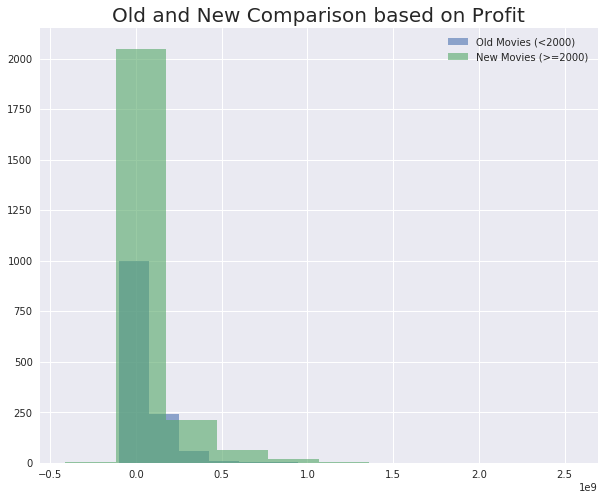

In [300]:
#PLOTTING a BAR-PLOT
old_rev.profit.hist(alpha=0.6, label='Old Movies (<2000)',figsize=(10,8))
new_rev.profit.hist(alpha=0.6, label='New Movies (>=2000)',figsize=(10,8))
plt.legend();
plt.title('Old and New Comparison based on Profit', fontsize=20);


**Conclusion:**<br>
Both average revenue values for old and new movies and the histogram shows that there is a significant difference!<br>
New movies makes more revenue.<br>
This is also needed to be considered that comparing old and new movies based on their corresponding profits will not reflect the real difference due to there is an inflation factor. Since the inflation factor is not provided in the data, its effect won't be included in this analysis.<br>
<br>
**Note that:** The phrase 'a significant difference' is used considering the ratio (~1.5) between the means.<br>
Here, the phrase is not related the statistical testing.<br>
The difference is also can be analyzed by some statistical methods (e.g. ANOVA) but it's not the subject of this study!


### Research Question 9 : Which production companies make average more profit than others? Find the top 5 company.

In the dataset the production companies are given with a pipe ('|') separator shown below:

In [301]:
df.production_companies.head(1)

0    Universal Studios|Amblin Entertainment|Legenda...
Name: production_companies, dtype: object

Let's split these companies and create a new table (dataframe) combined with the revenue per company value.<br>
It will be used as a source for company-revenue dataframe in subsequent step.

In [302]:
#SPLIT THE COMPANIES for each MOVIE
comp_split = df["production_companies"].str.split("|", n = 5, expand = True)
comp_split.columns = ['co1','co2','co3','co4','co5']
#ADDITIONAL COLUMN for NUMBER OF COMPANIES for each MOVIE
comp_split['totco']=5-comp_split[['co1','co2','co3','co4','co5']].isnull().sum(axis=1)
#ADDING THE PROFIT COLUMN to the SPLITTED COMPANY DATA FRAME
comp_split['profit']=df.profit
#ADDITIONAL COLUMN for AVERAGE PROFIT (Assumed all companies gets equal share from the profit)
comp_split['profit_perco']=comp_split['profit']/comp_split['totco']
comp_split.head(3)

,co1,co2,co3,co4,co5,totco,profit,profit_perco
0,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu,5,1.363529e+09,2.727058e+08
1,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None,2,2.284364e+08,1.142182e+08
2,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None,4,1.852382e+08,4.630955e+07


Now, let's create a dataframe which hold companies and their average profits!

In [303]:
comps = pd.concat([comp_split.co1,comp_split.co2,comp_split.co3,comp_split.co4,comp_split.co5]).reset_index(drop=True)
profs = pd.concat([comp_split.profit_perco,comp_split.profit_perco,comp_split.profit_perco,comp_split.profit_perco,comp_split.profit_perco]).reset_index(drop=True)
com_pro = pd.concat([comps, profs], axis=1, sort=False).dropna().reset_index(drop=True)
com_pro.columns = ['company','total_profit']
com_pro = {comp: com_pro.total_profit[com_pro.company == comp].mean() for comp in np.unique(com_pro.company)}

Let's show the **top-5 company** based on their average profits:

In [304]:
top5_com = {key: com_pro[key] for key in sorted(com_pro, key=com_pro.get, reverse=True)[:5]}
top5_com

{'Truenorth Productions': 622726075.0,
 'Marvel Studios': 444511209.1736111,
 'Lucasfilm': 304373054.25,
 'Illumination Entertainment': 285180087.10000002,
 'Disney Enterprises': 256875326.0}

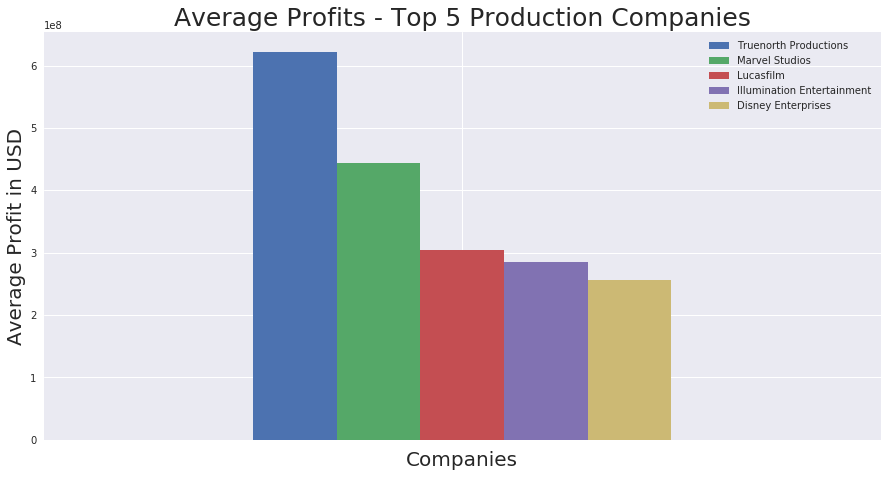

In [305]:
fig_size = plt.rcParams["figure.figsize"];
fig_size[0] = 15
fig_size[1] = 7.5
pd.DataFrame(top5_com, index=['']).plot(kind='bar');
#
plt.title('Average Profits - Top 5 Production Companies',fontsize=25)
plt.xlabel('Companies',fontsize=20);
plt.ylabel('Average Profit in USD',fontsize=20);

### Research Question 10 : Which movies make more money based on movie genre? Show top 5 genres.

In [306]:
gen_split = df["genres"].str.split("|", n = 5, expand = True)
gen_split.columns = ['g1','g2','g3','g4','g5']
#ADDING THE PROFIT COLUMN to the SPLITTED GENRE DATA FRAME
gen_split['profit']=df.profit
#ADDITIONAL COLUMN for NUMBER OF GENRES for each MOVIE
gen_split['totgen']=5-gen_split[['g1','g2','g3','g4','g5']].isnull().sum(axis=1)
#ADDING THE PROFIT COLUMN to the SPLITTED GENRE DATA FRAME
gen_split['profit']=df.profit
#ADDITIONAL COLUMN for AVERAGE PROFIT (Assumed all genres make equal profit for in a row!)
gen_split['profit_pergen']=gen_split['profit']/gen_split['totgen']
gen_split.head(3)

,g1,g2,g3,g4,g5,profit,totgen,profit_pergen
0,Action,Adventure,Science Fiction,Thriller,None,1.363529e+09,4,340882202.5
1,Action,Adventure,Science Fiction,Thriller,None,2.284364e+08,4,57109088.5
2,Adventure,Science Fiction,Thriller,None,None,1.852382e+08,3,61746067.0


Now, let's create a dataframe which hold genres and their corresponding average profits!

In [307]:
genres = pd.concat([gen_split.g1,gen_split.g2,gen_split.g3,gen_split.g4,gen_split.g5]).reset_index(drop=True)
profs_g = pd.concat([gen_split.profit_pergen,gen_split.profit_pergen,gen_split.profit_pergen,gen_split.profit_pergen,gen_split.profit_pergen]).reset_index(drop=True)
gen_pro = pd.concat([genres, profs_g], axis=1, sort=False).dropna().reset_index(drop=True)
gen_pro.columns = ['genre','total_profit']
gen_pro = {comp: gen_pro.total_profit[gen_pro.genre == comp].mean() for comp in np.unique(gen_pro.genre)}

Let's show the **top-5 genres** based on their average profits:

In [308]:
top5_gen = {key: gen_pro[key] for key in sorted(gen_pro, key=gen_pro.get, reverse=True)[:5]}
top5_gen

{'Animation': 56622069.889572643,
 'Adventure': 45467768.290689655,
 'Family': 45251716.644458234,
 'Fantasy': 44572948.669567101,
 'Science Fiction': 32757067.670882355}

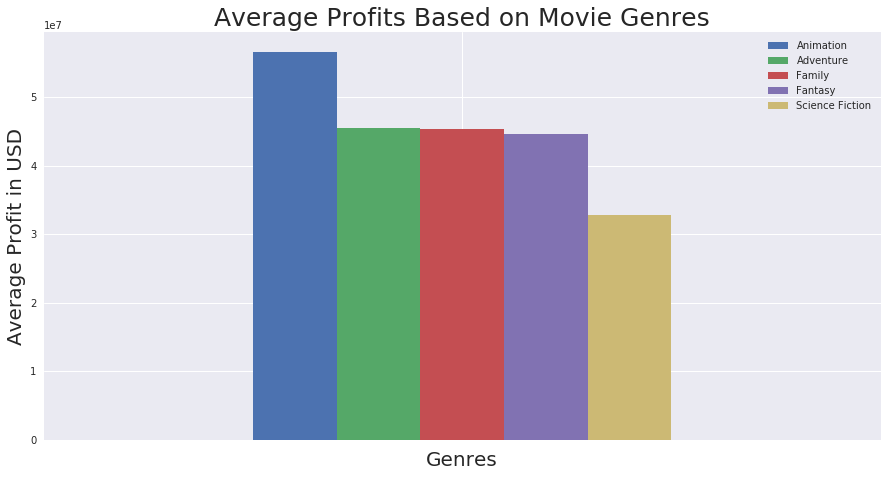

In [309]:
fig_size = plt.rcParams["figure.figsize"];
fig_size[0] = 15
fig_size[1] = 7.5
pd.DataFrame(top5_gen, index=['']).plot(kind='bar');
#
plt.title('Average Profits Based on Movie Genres',fontsize=25)
plt.xlabel('Genres',fontsize=20);
plt.ylabel('Average Profit in USD',fontsize=20);

<a id='conclusions'></a>
## Conclusions
<br>
According to processed data (TMDb):<br>

**The longest and shortest movies:**<br>
The movie has the maximum run time is 'Carlos' with '338.0' minutes!<br>
The movie has the minimum run time is 'Mickey's Christmas Carol' with '26.0' minutes!<br>
<br>
**The most popular and the most expensive movie:**<br>
The most popular film is 'Jurassic World' however it's not the movie which has the highest budget!<br>
The movie which has the highest budget is 'The Warrior's Way 'with '425,000,000' USD<br>
<br>
**Average profits (See limitations for the monetary unit):**<br>
The average profit for the 3677 movies in the dataset is 73,325,870 US dollars!<br>
However this dataset contains animations and short movies as well.<br>
<br>
If we only consider the movies that it's runtime more than (or equal to) 60 minutes.<br>
The average profit for the 2683 movies in the dataset is 146,842,281 US dollars!<br>
<br>
**The profit trend for the movies over years:**<br>
Altough the profit is fluctuating over years, the trend is an increasing trend for the profit of the movies.<br>
<br>
**Some correlations:**<br>
There is a moderate correlation (r = ~0.66) between budget and revenue.<br>
There is a very weak correlation (r = ~0.19) between average vote and revenue.<br>
It can not be inferred a causal relationship from a sample to population! This means that given correlation values should not be use as a reference for all movies in the world however this numbers give an insight for the 3677 movies given here.<br>
<br>
**Profitability Comparison between New and Old Movies:**<br>
Given dataset includes the movies relased between 1960 and 2015.<br>
Thus, here movies were categorized based on their release years as follows:<br>
***Old*** if they're released before 2000<br>
***New*** if they're released after (or in) 2000<br>
New movies makes more profit than old movies.<br>
This is also needed to be considered that comparing old and new movies based on their corresponding profits will not reflect the real difference due to there is an inflation factor. Since the inflation factor is not provided in the data, its effect won't be included in this analysis.<br>
<br>
**Note that**: The phrase 'a significant difference' is used by considering the significant ratio (~1.5) between the average profits.<br>
Here, the phrase is not related any statistical testing.<br>
The difference is also can be analyzed by some statistical methods (e.g. ANOVA) but it's not the subject of this study.<br>
<br>
**Top-5 Company (Based on their average profits):**<br>
'Truenorth Productions': 622,726,075 USD<br>
'Marvel Studios': 444,511,209 USD<br>
'Lucasfilm': 304,373,054 USD<br>
'Illumination Entertainment': 285,180,087 USD<br>
'Disney Enterprises': 256,875,326 USD<br>
<br>
First 3 of those companies exceeds 300 million USD profit in average!<br>

**Top-5 Company (Based on their average profits):**<br>
'Animation': 56,622,069 USD<br>
'Adventure': 45,467,768 USD<br>
'Family': 45,251,716 USD<br>
'Fantasy': 44,572,948 USD<br>
'Science Fiction': 32,757,067 USD<br>
<br>
According to the movie database, Animation genre movies make highest average profits between 1960 and 2015.<br>
After animation genre, following 3 genres Adventure, Family and Fantasy genre movies make higher profits than other genre movies. These genres almost make same average profit<br>
Last genre in top5 list is 'Science Fiction' and there is a significant difference between 'Science Fiction' and first 4 genre movies.
<br>
<br>
**Limitations:**<br>
Raw data contain 10866 rows for movie id.<br>
However, the raw data also contain missing values.<br>
Thus, after cleaning the raw data, 3677 rows remained.<br>
<br>
In the data, monetary unit and the unit for runtime were missing.<br>
One of the most popular movies was investigated externally and it's found that the monetary unit is USD.<br>
There might be differences for monetary units between movies based on their production companies however there is no information for that in the raw data. Thus, the monetary unit is assummed as USD for all movies in the dataset.<br>
<br>
Also, inflation rates were not given for the movies. This is also ignored in the analysis.<br>
Reported by Ugur Uresin, MSc.<br>
2019/08/09